In [8]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv(".\dataset\Advertising.csv",index_col=0)
df.head(5)            

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
df.shape

(200, 4)

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


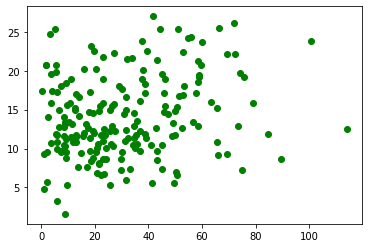

In [14]:
plt.scatter(df['Newspaper'],df['Sales'],c='g')

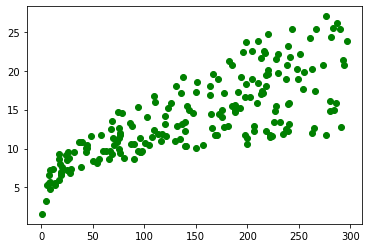

In [15]:
plt.scatter(df['TV'],df['Sales'],c='g')

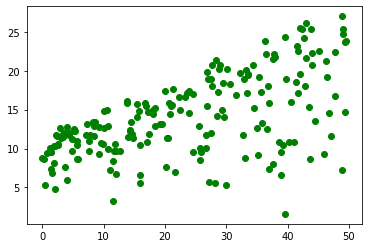

In [16]:
plt.scatter(df['Radio'],df['Sales'],c='g')

In [17]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


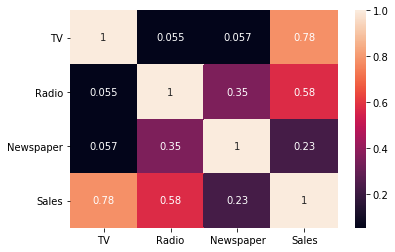

In [21]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [28]:
X=df['TV'].values.reshape(-1,1)
Y=df['Sales'].values.reshape(-1,1)

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.30,random_state=0)

In [30]:
xtrain.shape,ytrain.shape

((140, 1), (140, 1))

In [31]:
import statsmodels.api as sm 

In [34]:
train_Data_With_Intercept=sm.add_constant(xtrain)
train_Data_With_Intercept

array([[  1. , 265.2],
       [  1. , 197.6],
       [  1. , 218.5],
       [  1. , 147.3],
       [  1. , 171.3],
       [  1. , 217.7],
       [  1. , 262.7],
       [  1. , 163.5],
       [  1. , 100.4],
       [  1. ,  76.3],
       [  1. , 184.9],
       [  1. , 134.3],
       [  1. , 273.7],
       [  1. , 296.4],
       [  1. ,  96.2],
       [  1. , 109.8],
       [  1. , 255.4],
       [  1. , 204.1],
       [  1. , 240.1],
       [  1. , 193.7],
       [  1. , 191.1],
       [  1. ,  89.7],
       [  1. ,  43. ],
       [  1. ,  38.2],
       [  1. ,  13.1],
       [  1. , 239.3],
       [  1. ,  17.2],
       [  1. , 210.7],
       [  1. ,  25.6],
       [  1. , 177. ],
       [  1. , 206.9],
       [  1. ,  66.1],
       [  1. , 149.7],
       [  1. , 129.4],
       [  1. ,  94.2],
       [  1. , 276.7],
       [  1. , 276.9],
       [  1. ,   7.8],
       [  1. , 250.9],
       [  1. , 175.7],
       [  1. ,  11.7],
       [  1. ,  75.5],
       [  1. , 199.8],
       [  1

In [41]:
statsModel=sm.OLS(ytrain,train_Data_With_Intercept)
model=statsModel.fit()

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           4.76e-26
Time:                        19:29:53   Log-Likelihood:                -371.64
No. Observations:                 140   AIC:                             747.3
Df Residuals:                     138   BIC:                             753.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3108      0.611     11.957      0.000       6.102       8.520
x1             0.0458      0.003     13.125      0.000       0.039       0.053
==============================================================================
Omnibus:                        1.727   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.422   Jarque-Bera (JB):                1.452
Skew:                          -0.086   Prob(JB):                        0.484
Kurtosis:                       2.532   Cond. No.                         366.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model=LinearRegression(normalize=True).fit(xtrain,ytrain)

In [47]:
model.score(xtrain,ytrain)

0.5552336104251212

In [50]:
ypredict=model.predict(xtest)
ypredict

array([[10.48116264],
       [ 9.60152727],
       [11.4524267 ],
       [20.58322509],
       [15.1084112 ],
       [ 9.8855762 ],
       [ 7.70939494],
       [18.31083372],
       [ 8.40119151],
       [16.36372418],
       [19.28209777],
       [11.3058208 ],
       [14.48533615],
       [15.91474363],
       [10.81102591],
       [12.81769409],
       [19.47909945],
       [ 7.3428802 ],
       [10.73314153],
       [17.08759078],
       [20.48701497],
       [13.73856237],
       [15.33290148],
       [13.34455903],
       [ 9.76187747],
       [12.95055569],
       [14.89766523],
       [16.70275031],
       [17.57322281],
       [ 8.46075015],
       [10.41702256],
       [16.42328282],
       [20.17089601],
       [18.38413667],
       [ 7.91555948],
       [ 8.16753836],
       [10.04134496],
       [15.59404323],
       [10.44451117],
       [ 8.45616872],
       [ 9.00135939],
       [ 8.75396194],
       [13.85767966],
       [16.91349628],
       [17.17921947],
       [12

In [53]:
from sklearn.metrics import r2_score

In [56]:
r2_score(ytest,ypredict)

0.725606346597073

Text(0, 0.5, 'Sales')

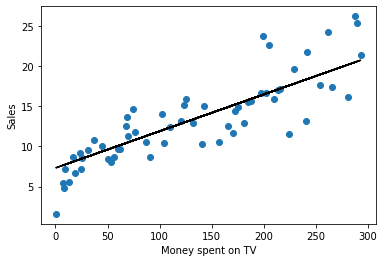

In [59]:
plt.scatter(xtest,ytest)
plt.plot(xtest,ypredict,c="black")
plt.xlabel("Money spent on TV")
plt.ylabel("Sales")

In [62]:
X=df.drop(["Sales"],axis=1)
Y=df["Sales"]

In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.3)

In [77]:
train_with_intercept=sm.add_constant(xtrain)
model=sm.OLS(ytrain,train_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     501.5
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           2.61e-73
Time:                        21:00:01   Log-Likelihood:                -256.77
No. Observations:                 140   AIC:                             521.5
Df Residuals:                     136   BIC:                             533.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0046      0.342      8.779      0.000       2.328       3.681
TV             0.0446      0.002     28.879      0.000       0.042       0.048
Radio          0.2064      0.010     21.594      0.000       0.187       0.225
Newspaper     -0.0089      0.006     -1.418      0.158      -0.021       0.004
==============================================================================
Omnibus:                       17.058   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.323
Skew:                          -0.830   Prob(JB):                     6.37e-05
Kurtosis:                       3.748   Cond. No.                         470.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
modelLR=LinearRegression(normalize=True).fit(xtrain,ytrain)
modelLR.score(xtrain,ytrain)

0.9170936679332529

In [84]:
ypredict=modelLR.predict(xtest)

1.0

In [86]:
r2_score(ytest,ypredict)


0.8319368678729038